In [2]:
import numpy as np
import matplotlib.pyplot as plt
from training_model.discriminative_learning import Discriminative_Learning
from training_model.lda_learning import LDA_Learning
from kfold_cross_validation.kfold_cross_validation import kfold_cross_validation
from advance_model.Discriminative_Learning_advance import DL_advance



# All below cell is independent, run each cell for corresponding task

    # Run this cell for compare thresshold task and compare learning rate

C:\Users\VanBinh\OneDrive\Fall_2021\Mcgill-ML\project\project1\training_model\discriminative_learning.py:70: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


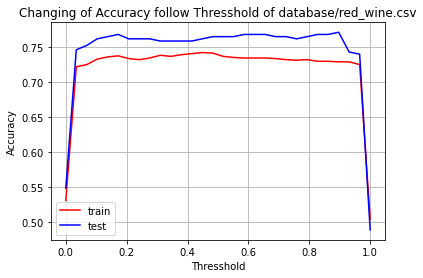

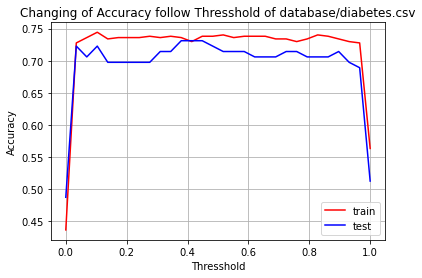

---Training time of database type1  is 0.020162582397460938 seconds ---
---Training time of database type2  is 0.06249094009399414 seconds ---
Accuracy of data = database/red_wine.csv with learning rate type 1/(k+1):
	 training accuracy = [0.740625], validing  accuracy = [0.7648902821316614]
Accuracy of data = database/red_wine.csv with learning rate type 1/(2**t):
	 training accuracy = [0.71640625], validing  accuracy = [0.7147335423197492]


C:\Users\VanBinh\OneDrive\Fall_2021\Mcgill-ML\project\project1\training_model\discriminative_learning.py:70: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


In [3]:
DL_info = {'path': 'database/red_wine.csv', 
              'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
             }

DL = Discriminative_Learning()
DL.init(DL_info)

# changing Accuracy follow different Thresshold 
DL.comp_thresshold()

DL_info = {'path': 'database/diabetes.csv', 
              'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
             }
DL.init(DL_info)
DL.comp_thresshold()

# changing of Accucracy follow differnt learning rate
acc_train_model, acc_valid_model = DL.comp_learning_rate()
print('Accuracy of data = {} with learning rate type 1/(k+1):'.format(DL.path_csv))
print('\t training accuracy = {}, validing  accuracy = {}'.format(acc_train_model['type1'], acc_valid_model['type1']))

print('Accuracy of data = {} with learning rate type 1/(2**t):'.format(DL.path_csv))
print('\t training accuracy = {}, validing  accuracy = {}'.format(acc_train_model['type2'], acc_valid_model['type2']))

    # Kfold task

In [4]:
kfold_info = {'kflod': 10, 'path': 'database/red_wine.csv'}

DL_info =    {'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
          }


DL_model = Discriminative_Learning
model = kfold_cross_validation(DL_model)
model.kflod_init(kfold_info, DL_info)

DL_train_acc, DL_valid_acc = model.kflod_validation()
print('Discriminative learning training model')
print('The accuracy of training for {} database = '.format(kfold_info['path']) + str(DL_train_acc))
print('The accuracy of test for {} database = '.format(kfold_info['path']) + str(DL_valid_acc))


LDA_info = {  'thresshold': 0,
              'rate': 0.8
          }
LDA_model = LDA_Learning

model = kfold_cross_validation(LDA_model)
model.kflod_init(kfold_info, LDA_info)
LDA_train_acc, LDA_valid_acc = model.kflod_validation()
print('LDA training model')
print('The accuracy of training for {} database = '.format(kfold_info['path']) + str(LDA_train_acc))
print('The accuracy of test for {} database = '.format(kfold_info['path']) + str(LDA_valid_acc))




Discriminative learning training model
The accuracy of training for database/red_wine.csv database = 0.7513687980433263
The accuracy of test for database/red_wine.csv database = 0.7440139263252471
LDA training model
The accuracy of training for database/red_wine.csv database = 0.7460905835080365
The accuracy of test for database/red_wine.csv database = 0.7453728661275831


    # new stop criteria, add feature, remove feature

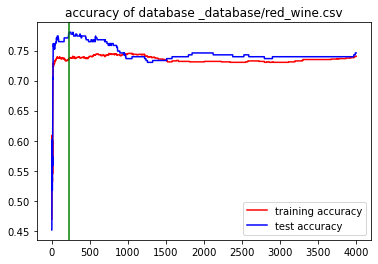

The accuracy new fit() of training for database/red_wine.csv database = 0.7359375
The accuracy new fit of Testing for database/red_wine.csv database = 0.7774294670846394
(1, 1599)
feature at position = [1, 2, 4, 7, 10, 11] are remained
training accuracy those database = 0.74296875
testing accuracy those database = 0.7586206896551724
feature xi*xj at position [[-1, 0]] should be added
acc_train_vec [0.73671875]
acc_test_vec [0.7774294670846394]


In [5]:
   
# try new stop criteria
DL_info = {'path': 'database/red_wine.csv', 
              'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
             }

model = Discriminative_Learning
DL = DL_advance(model)
DL.DL_init(DL_info)
   
W,Acc_train_vec, Acc_test_vec = DL.fit_adv()

print('The accuracy new fit() of training for {} database = '.format(DL.model.path_csv) + str(Acc_train_vec))
print('The accuracy new fit of Testing for {} database = '.format(DL.model.path_csv) + str(Acc_test_vec))


# this code is to remove unnecessary feature
DL_info = {'path': 'database/red_wine.csv', 
              'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
             }

model = Discriminative_Learning
DL = DL_advance(model)
DL.DL_init(DL_info)
   
acc_train_prev, acc_test_prev, idx_feature = DL.remove_feature()

print('feature at position = {} are remained'.format(idx_feature))
print('training accuracy those database = {}'.format(acc_train_prev))
print('testing accuracy those database = {}'.format(acc_test_prev))

# this code is to check for adding new feature from xi*xj, xi**2
DL_info = {'path': 'database/red_wine.csv', 
              'epsilon': 0.05,
              'learning_type': 'type1',
              'alpha': 0.2,
              'thresshold': 0.5,
              'rate': 0.8
             }

model = Discriminative_Learning
DL = DL_advance(model)
DL.DL_init(DL_info)

acc_train_vec, acc_test_vec, idx_feature = DL.add_feature()
print('feature xi*xj at position {} should be added'.format(idx_feature))
print('acc_train_vec', acc_train_vec)
print('acc_test_vec', acc_test_vec)
